In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/pranav/Desktop/ML-Crate/Spam Email Detection/Dataset/spambase.data',header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
df.shape

(4601, 58)

In [5]:
df_names = pd.read_csv('/Users/pranav/Desktop/ML-Crate/Spam Email Detection/Dataset/col_names.csv' , sep=':')

<u>NOTE</u>:*I have referenced these column names from an external source because the original file that I downloaded had a column name missing.*

In [6]:
col_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'class']

In [7]:
df.columns = col_names

In [8]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# Train/Test Split

In [9]:
X = df.drop('class',axis=1)
y = df['class']

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state=20)

# Exploring The Training Dataset
We'll explore the training dataset because usually that's the only dataset you'll be provide and you'll need to analze

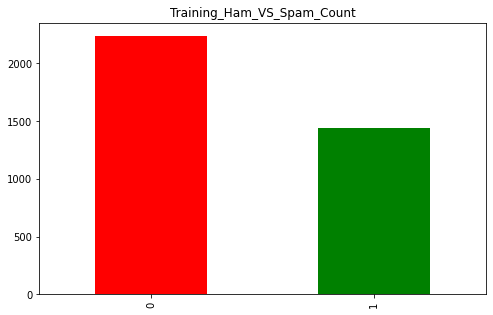

In [11]:
plt.figure(figsize=(8,5))
y_train.value_counts().plot(kind='bar',color=['red','green'])
plt.title('Training_Ham_VS_Spam_Count')
plt.show()

The number of non spam mails is higher but it dosen't have high bias, so it's good.

In [12]:
fig = px.imshow(X.corr())
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()
plt.show()

I have seen the correlations but there isn't really a noticebale correlation between the features and it's all pretty random, and this is common for these kind of problems.

# Trying Various Base Models

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [17]:
models = {
    'KNeighborsClassifier' : {
        'model' : KNeighborsClassifier(),
        'params' : dict(leaf_size=list(range(1,50)), n_neighbors=list(range(1,30)), p=[1,2])
    },
    'RandomForestClassifier' : {
        'model': RandomForestClassifier(),
        'params' : {
            'bootstrap': [True, False],
             'max_depth': [10, 20, 30],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [100, 250, 500]
        }
    },
    'MultinomialNB': {
        'model' : MultinomialNB(),
        'params': {}
    }
}

from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in models.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
results = pd.DataFrame(scores,columns=['model','best_score','best_params'])
results

,model,best_score,best_params
0,KNeighborsClassifier,0.826902,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}"
1,RandomForestClassifier,0.953261,"{'bootstrap': False, 'max_depth': 30, 'max_fea..."
2,MultinomialNB,0.791033,{}


In [26]:
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C':list(range(5,50,5)),
            'max_iter':[100,500,900,1000]
        }
    }
}
for model_name, mp in models.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
results2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
results2

/Users/pranav/Desktop/ML-Crate/Spam Email Detection/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/pranav/Desktop/ML-Crate/Spam Email Detection/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

,model,best_score,best_params
0,KNeighborsClassifier,0.826902,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}"
1,RandomForestClassifier,0.953261,"{'bootstrap': False, 'max_depth': 30, 'max_fea..."
2,MultinomialNB,0.791033,{}
3,LogisticRegression,0.931250,"{'C': 20, 'max_iter': 900}"


Here we clearly can see that the RandomForest Classifier has the most accurate results. So let's actually create a new Random forest classifier and validate it's accuracy on the test set.

## Selecting a Model

In [16]:
main_model = RandomForestClassifier(max_depth=30,bootstrap= False,)
main_model.fit(X_train,y_train)

preds = main_model.predict(X_test)

accuracy = accuracy_score(y_test,preds)
print(f'The accuracy of RandomForest Classifier on Test Set is {accuracy}')

The accuracy of RandomForest Classifier on Test Set is 0.9652551574375678


In [23]:
fig = px.imshow(confusion_matrix(y_test,preds),)

fig.show()

### Final accuracy on the test dataset is 96.5%

In [24]:
import joblib
joblib.dump(main_model,'RandomForestClassifier.joblib')

['RandomForestClassifier.joblib']